In [1]:
import torch
from min_dalle import MinDalle
from IPython.display import display, update_display
import glob

## Check CUDA

In [2]:
torch.cuda.is_available()

True

## Load pretrained models

In [3]:
model = MinDalle(
    models_root='./pretrained',
    dtype=torch.float32,
    device='cuda',
    is_mega=True,
    is_reusable=False
)

using device cuda
intializing TextTokenizer


## Definition of the parameters
- Input Text: For long prompts, only the first 64 text tokens will be used to generate the image.
- Grid Size: Size of the image grid. 3x3 takes about 15 seconds.
- Seamless: Tile images in image token space instead of pixel space.
- Temperature: High temperature increases the probability of sampling low scoring image tokens.
- Top-k: Each image token is sampled from the top-k scoring tokens.
- Super Condition: Higher values can result in better agreement with the text.

## Initialize the generation of images

In [21]:
%%time

image = model.generate_image(
    text='God enters earth from space looking down on the humanity',
    seed=-1,
    grid_size=2,
    is_seamless=False,
    temperature=14,
    top_k=128,
    supercondition_factor=64,
    is_verbose=False
)

initializing DalleBartEncoder
initializing DalleBartDecoder
initializing VQGanDetokenizer
CPU times: total: 1min 23s
Wall time: 38 s


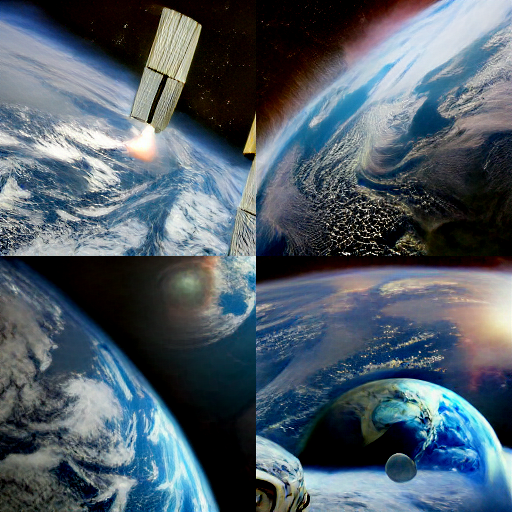

In [22]:
display(image)

In [18]:
L = len(glob.glob('./data/*.png'))

image.save(f'./data/image_{L+1}.png')

## Generating a grid of generated images

initializing DalleBartEncoder
initializing DalleBartDecoder
initializing VQGanDetokenizer


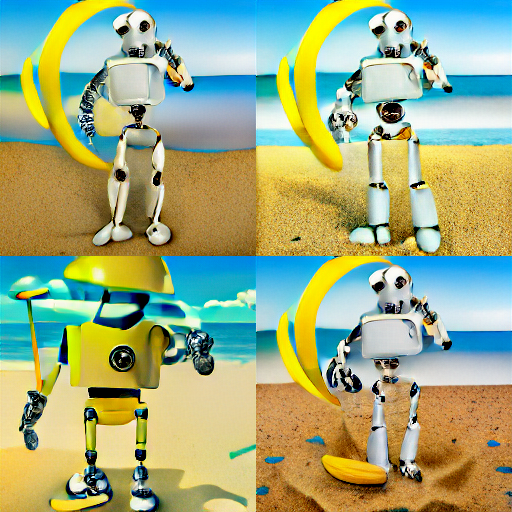

In [32]:
image_stream = model.generate_image_stream(
    text='A robot is eating a banana at the beach',
    seed=-1,
    grid_size=2,
    is_seamless=False,
    temperature=1,
    top_k=10,
    supercondition_factor=512,
    is_verbose=False
)

is_first = True
for image in image_stream:
    L = len(glob.glob('./data/*.png'))
    display_image = display if is_first else update_display
    image.save(f'./data/image_{L+1}.png')
    display_image(image, display_id=1)
    is_first = False

## Generating a sequence of generated images

In [6]:
num_gens = 3

for i in range(num_gens):
    L = len(glob.glob('./data/*.png'))
    image_stream = model.generate_image_stream(
                    text=f'a region of spacetime where gravity is so strong that nothing can escape',
                    seed=-1,
                    grid_size=1,
                    is_seamless=False,
                    temperature=1,
                    top_k=128,
                    supercondition_factor=2,
                    is_verbose=False
                )

    for image in image_stream:
        image.save(f'./data/image_{L+1}.png')

initializing DalleBartEncoder
initializing DalleBartDecoder
initializing VQGanDetokenizer
initializing DalleBartEncoder
initializing DalleBartDecoder
initializing VQGanDetokenizer
initializing DalleBartEncoder
initializing DalleBartDecoder
initializing VQGanDetokenizer
